# EEG Analysis for Hand Movements

## Import Libraries

Use "!pip install [Library Name]"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

## Exploratory Data Analysis on our dataset

Let's import our dataset.
Because there are 4 different csv files for 4 different users we can use a loop in order to put all these datasets into one single dataframe.

In [2]:
dfs = [pd.read_csv('D:/University/EEG_paper/Dataset/user_' + user + '.csv') for user in ['a', 'b', 'c', 'd']]

In [3]:
for i in range(len(dfs)):
    dfs[i]['User'] = pd.Series(i, index=dfs[i].index)

In [4]:
data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

Let's see what our Dataframe looks like.

In [5]:
df =data
df

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User
0,0.0,3572.252440,2065.056469,0.851824,2.047953,0.651871,2.522036,2.109733,3.347705,3564.779879,...,35.151586,3628.426885,2129.789645,5.353671,17.885132,7.672209,29.960618,43.216980,43.932669,0
1,1.0,3574.116024,2065.528155,1.932513,3.321636,1.138012,2.349805,2.256212,3.945981,3563.399422,...,40.800889,3680.341349,2144.200503,10.819521,36.995982,12.812193,24.146774,23.747501,49.072017,0
2,0.0,3554.487593,2056.215665,0.935015,3.793783,0.736168,2.680542,3.381325,4.678876,3568.839949,...,18.176841,3538.347368,2081.315814,5.486555,13.204753,0.664075,6.633072,1.434277,4.132446,2
3,0.0,3570.668125,2063.974908,1.875394,3.028541,0.910000,3.018672,1.163312,2.883009,3565.403408,...,55.547547,3604.601528,2122.493834,15.611283,16.452483,22.462175,46.703612,32.213578,70.892466,0
4,0.0,3559.747108,2057.401763,1.053691,1.530594,1.593121,2.789907,2.668865,4.326693,3573.651774,...,7.208052,3513.244789,2030.461207,1.455450,3.030659,0.482971,3.200647,0.895170,2.099638,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,2.0,3570.748191,2063.201099,0.727594,1.404708,0.995674,2.569811,0.991322,1.987807,3562.594707,...,1.910036,3567.687654,2062.791757,1.748982,2.097780,1.242056,1.682180,1.277379,1.997654,3
11516,1.0,3566.600695,2062.436502,1.491797,3.013466,1.338308,2.769207,4.268401,3.877338,3576.187723,...,5.217772,3548.277991,2055.537892,1.787661,3.366967,0.810903,1.739812,2.202195,3.294145,2
11517,0.0,3574.186933,2064.477869,0.710708,1.534898,0.749206,2.038258,2.208018,2.157076,3566.398415,...,2.200203,3572.290285,2063.776063,1.268569,2.547969,0.887808,1.651011,1.533523,1.957866,1
11518,0.0,3574.343116,2065.996679,0.606401,2.835015,0.617079,1.209722,3.357912,3.098423,3566.521533,...,15.413625,3608.394990,2091.509508,1.479338,3.824176,3.281520,4.238889,33.441194,19.158094,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Columns: 114 entries, Class to User
dtypes: float64(113), int64(1)
memory usage: 10.0 MB


In [7]:
df.describe()

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,...,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,1.000000,3571.588010,2064.802117,1.042080,2.461821,0.909898,2.201861,2.197638,3.082371,3568.526257,...,11.538165,3578.750414,2077.076972,2.535672,6.408382,2.531363,6.396447,10.238555,11.640444,1.500000
std,0.816532,8.332205,5.111574,0.616193,1.240949,0.462773,0.834416,0.895613,0.837786,4.461650,...,14.459010,31.429308,26.881689,3.667870,9.503169,3.979140,9.289700,17.005642,17.357938,1.118083
min,0.000000,3370.595863,1978.862421,0.030171,0.479354,0.066521,0.479033,0.526885,1.308723,3555.254510,...,0.934593,2705.784083,2010.355030,0.047412,0.499164,0.043295,0.490850,0.465208,1.350438,0.000000
25%,0.000000,3569.067460,2063.029951,0.678118,1.902200,0.594002,1.678946,1.456163,2.397392,3564.948753,...,2.029585,3567.472989,2062.537954,0.799992,2.056858,0.688798,1.835439,1.217960,2.182373,0.750000
50%,1.000000,3571.816872,2064.547292,0.961184,2.312287,0.845206,2.116816,2.112369,2.947443,3567.678533,...,3.687725,3571.077723,2064.741919,1.239481,2.755133,1.062308,2.509870,1.593670,2.540830,1.500000
75%,2.000000,3574.115918,2065.889854,1.285127,2.775746,1.148914,2.610754,2.779936,3.650024,3571.772812,...,16.398057,3587.656882,2087.591409,2.317750,6.816659,1.994364,5.440804,6.415053,8.982841,2.250000
max,2.000000,3725.451803,2189.586102,15.206517,30.192580,9.030337,22.057474,5.574868,7.237756,3588.176094,...,89.132433,3758.046521,3005.693915,95.606765,244.145529,94.448386,138.908194,88.024693,94.350650,3.000000


Checking for any Missing Values in our dataframe.

In [8]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


Plotting our classes.

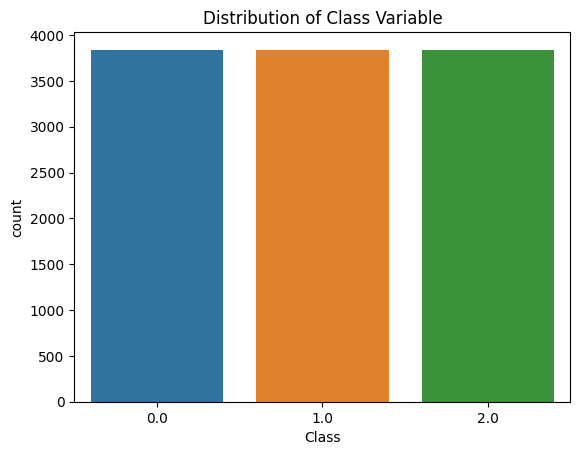

In [9]:
sns.countplot(x='Class', data=df)
plt.title('Distribution of Class Variable')
plt.show()

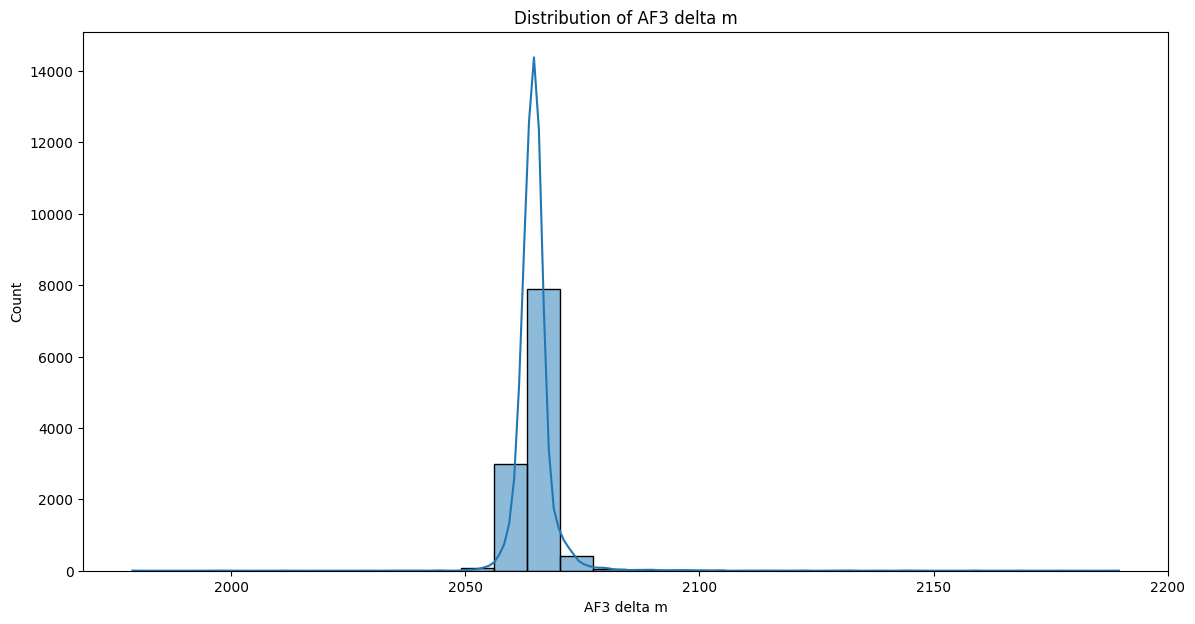

In [10]:
plt.figure(figsize=(14, 7))

sns.histplot(df['AF3 delta m'], kde=True, bins=30)
plt.title('Distribution of AF3 delta m')
plt.show()

Plotting Correlation Matrix

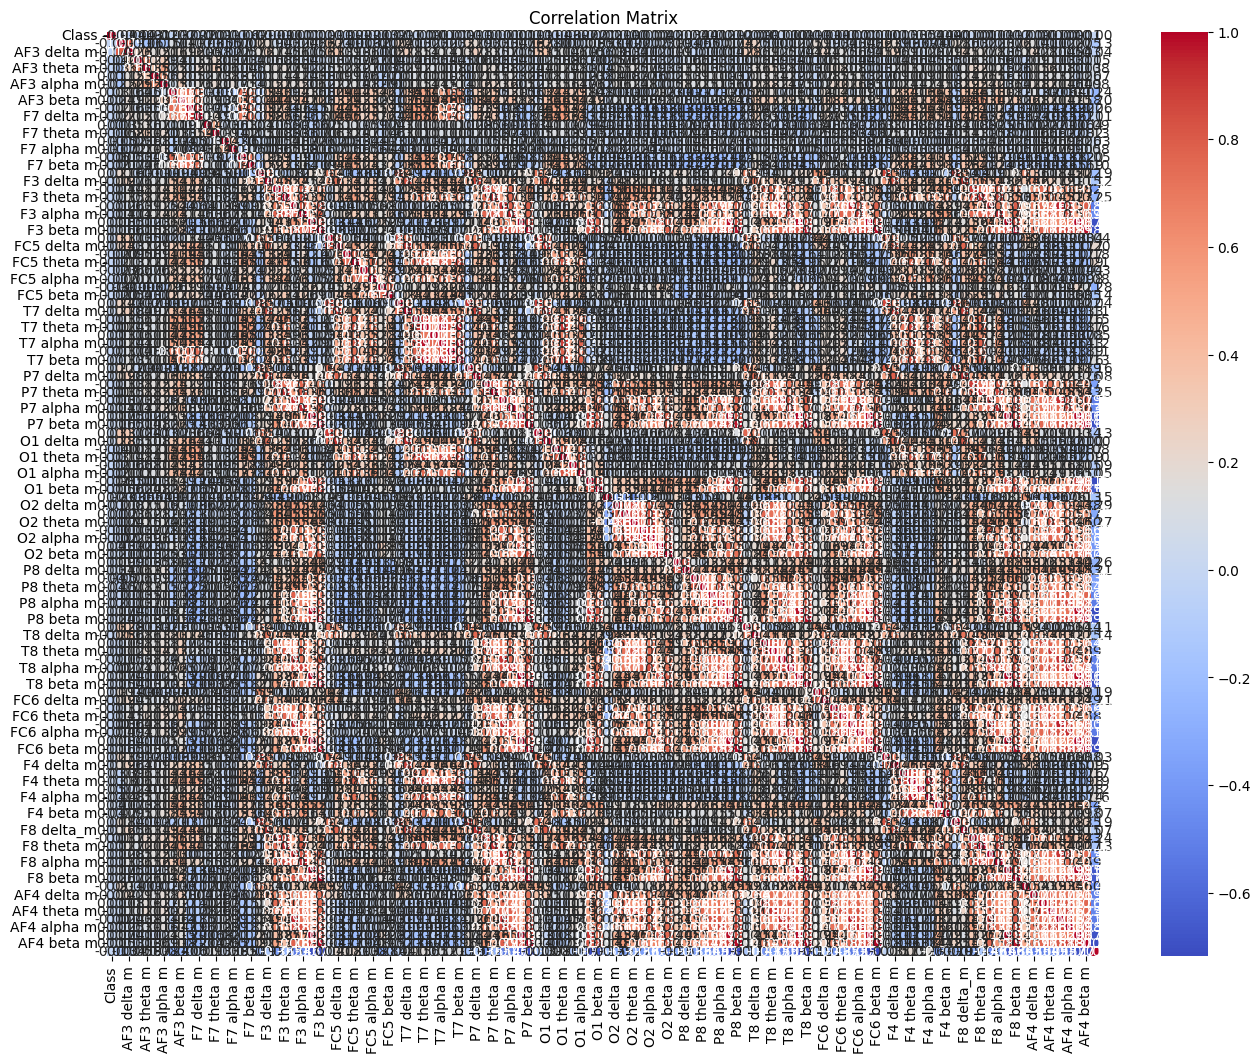

In [11]:
correlation_matrix = df.corr()

#correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

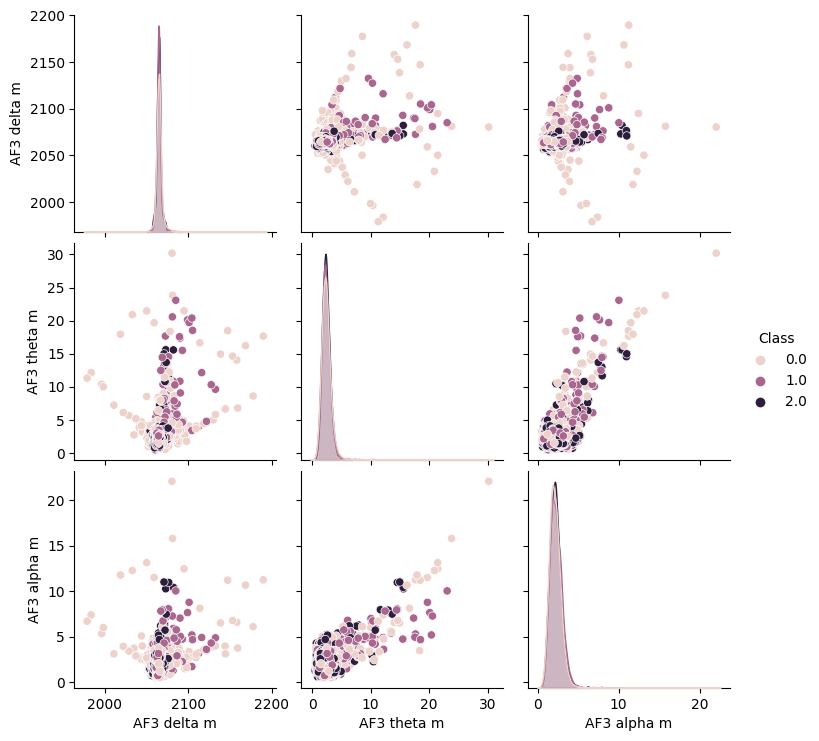

In [12]:
sns.pairplot(df[['AF3 delta m', 'AF3 theta m', 'AF3 alpha m', 'Class']], hue='Class')
plt.show()

Trying to do PCA-based dimensionality reduction. 

However it seemslike it wont work well and we need to work on it later!

In [13]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

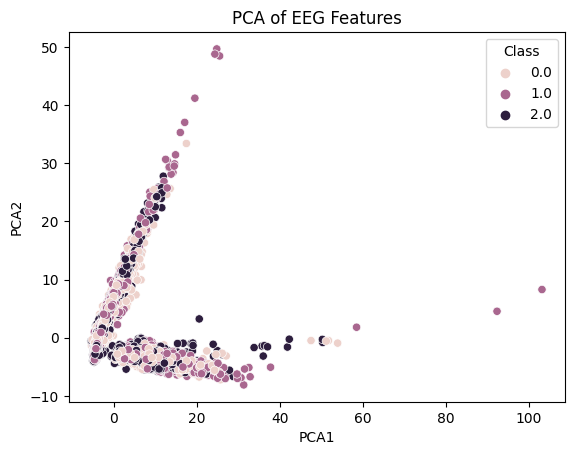

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Class', 'User']))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=df)
plt.title('PCA of EEG Features')
plt.show()

## Models


In [16]:
!pip install scikit-learn xgboost lightgbm tensorflow


Importing Libraries that could help us applying model.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Choosing our Target column which we want to predict (Class)!

20% of our data in going to be Testing Data and other 80% is our training Data. 

In [18]:

X = df.drop(columns=['Class', 'User']) 
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Assigning models to a dictionary. How ever we have to create another function for our Neural Network Model!

In [19]:
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))  
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


Finding Accuracies.

In [20]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

nn_model = create_nn_model(X_train_scaled.shape[1])
nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)
_, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
results['Neural Network'] = nn_accuracy
print(f'Neural Network Accuracy: {nn_accuracy:.4f}')


SVM Accuracy: 0.5707
Random Forest Accuracy: 0.8351
KNN Accuracy: 0.6875
LDA Accuracy: 0.4488
Naive Bayes Accuracy: 0.3789


C:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:24:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29070
[LightGBM] [Info] Number of data points in the train set: 9216, number of used features: 114
[LightGBM] [Info] Start training from score -1.104816
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.092446
LightGBM Accuracy: 0.8016
Gradient Boosting Accuracy: 0.6389


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Accuracy: 0.6016


In [21]:
print("\nModel Performance Summary:")
for name, accuracy in results.items():
    print(f'{name}: {accuracy:.4f}')



Model Performance Summary:
SVM: 0.5707
Random Forest: 0.8351
KNN: 0.6875
LDA: 0.4488
Naive Bayes: 0.3789
XGBoost: 0.8056
LightGBM: 0.8016
Gradient Boosting: 0.6389
Neural Network: 0.6016


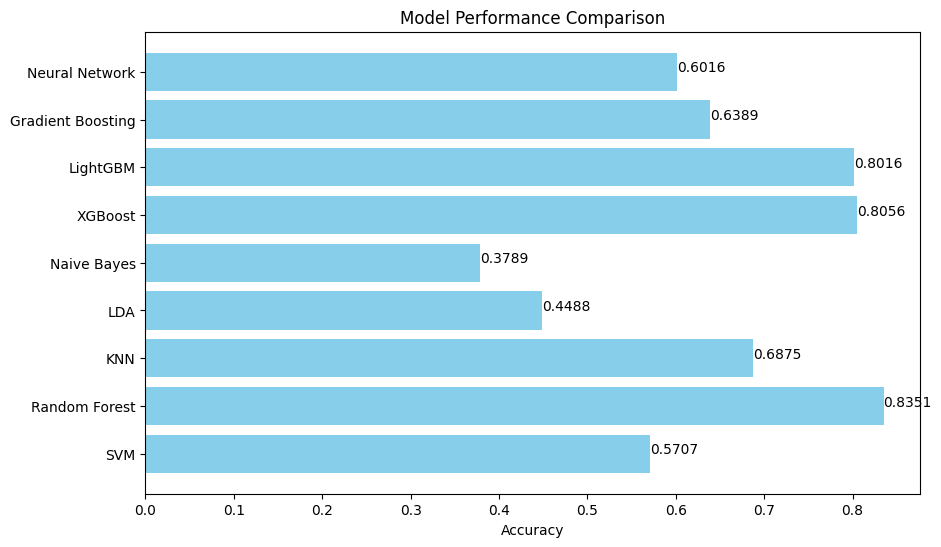

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')

# accuracy chart
for index, value in enumerate(results.values()):
    plt.text(value, index, f"{value:.4f}")

plt.show()

Finding Models Response Time.

In [23]:
import time
from sklearn.metrics import accuracy_score

In [24]:
results = {}

for name, model in models.items():
    start_time = time.perf_counter()
    
    model.fit(X_train_scaled, y_train)
    
    train_time = time.perf_counter() - start_time
    
    start_time = time.perf_counter()
    
    y_pred = model.predict(X_test_scaled)
    
    predict_time = time.perf_counter() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {'accuracy': accuracy, 'train_time': train_time, 'predict_time': predict_time}
    
    print(f'{name} Accuracy: {accuracy:.4f}, Training Time: {train_time:.4f}s, Prediction Time: {predict_time:.4f}s')


SVM Accuracy: 0.5707, Training Time: 4.4897s, Prediction Time: 1.3819s
Random Forest Accuracy: 0.8286, Training Time: 10.9885s, Prediction Time: 0.0404s
KNN Accuracy: 0.6875, Training Time: 0.0036s, Prediction Time: 0.1567s
LDA Accuracy: 0.4488, Training Time: 0.1270s, Prediction Time: 0.0010s
Naive Bayes Accuracy: 0.3789, Training Time: 0.0116s, Prediction Time: 0.0049s


C:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8056, Training Time: 1.4165s, Prediction Time: 0.0037s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29070
[LightGBM] [Info] Number of data points in the train set: 9216, number of used features: 114
[LightGBM] [Info] Start training from score -1.104816
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.092446
LightGBM Accuracy: 0.8016, Training Time: 0.6578s, Prediction Time: 0.0082s
Gradient Boosting Accuracy: 0.6393, Training Time: 112.1810s, Prediction Time: 0.0076s


In [25]:
# For nnetwork model
start_time = time.time()
nn_model = create_nn_model(X_train_scaled.shape[1])
nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)
train_time = time.time() - start_time

start_time = time.time()
_, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
predict_time = time.time() - start_time


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
results['Neural Network'] = {'accuracy': nn_accuracy, 'train_time': train_time, 'predict_time': predict_time}
print(f'Neural Network Accuracy: {nn_accuracy:.4f}, Training Time: {train_time:.4f}s, Prediction Time: {predict_time:.4f}s')

print("\nModel Performance Summary:")
for name, metrics in results.items():
    print(f"{name}: Accuracy: {metrics['accuracy']:.4f}, Training Time: {metrics['train_time']:.4f}s, Prediction Time: {metrics['predict_time']:.4f}s")

Neural Network Accuracy: 0.5942, Training Time: 4.8049s, Prediction Time: 0.1255s

Model Performance Summary:
SVM: Accuracy: 0.5707, Training Time: 4.4897s, Prediction Time: 1.3819s
Random Forest: Accuracy: 0.8286, Training Time: 10.9885s, Prediction Time: 0.0404s
KNN: Accuracy: 0.6875, Training Time: 0.0036s, Prediction Time: 0.1567s
LDA: Accuracy: 0.4488, Training Time: 0.1270s, Prediction Time: 0.0010s
Naive Bayes: Accuracy: 0.3789, Training Time: 0.0116s, Prediction Time: 0.0049s
XGBoost: Accuracy: 0.8056, Training Time: 1.4165s, Prediction Time: 0.0037s
LightGBM: Accuracy: 0.8016, Training Time: 0.6578s, Prediction Time: 0.0082s
Gradient Boosting: Accuracy: 0.6393, Training Time: 112.1810s, Prediction Time: 0.0076s
Neural Network: Accuracy: 0.5942, Training Time: 4.8049s, Prediction Time: 0.1255s


In [40]:
results

{'Random Forest': {'accuracy': 0.8285590277777778,
  'train_time': 10.988472600001842,
  'predict_time': 0.04036489996360615},
 'KNN': {'accuracy': 0.6875,
  'train_time': 0.0035971999750472605,
  'predict_time': 0.15671910002129152},
 'LDA': {'accuracy': 0.4487847222222222,
  'train_time': 0.12696530000539497,
  'predict_time': 0.0009962000185623765},
 'Naive Bayes': {'accuracy': 0.37890625,
  'train_time': 0.011573399999178946,
  'predict_time': 0.004935600038152188},
 'XGBoost': {'accuracy': 0.8055555555555556,
  'train_time': 1.41647469997406,
  'predict_time': 0.003726899973116815},
 'LightGBM': {'accuracy': 0.8016493055555556,
  'train_time': 0.6578212000313215,
  'predict_time': 0.008209999999962747},
 'Gradient Boosting': {'accuracy': 0.6393229166666666,
  'train_time': 112.18095160002122,
  'predict_time': 0.007555699965450913},
 'Neural Network': {'accuracy': 0.5941840410232544,
  'train_time': 4.804942607879639,
  'predict_time': 0.12547850608825684}}

In [47]:
results.pop('SVM', None) 


In [48]:
model_names = list(results.keys())
accuracy = [metrics['accuracy'] for accuracy in results.values()]

predict_times = [metrics['predict_time'] for metrics in results.values()]


In [49]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Prediction Time Comparison')

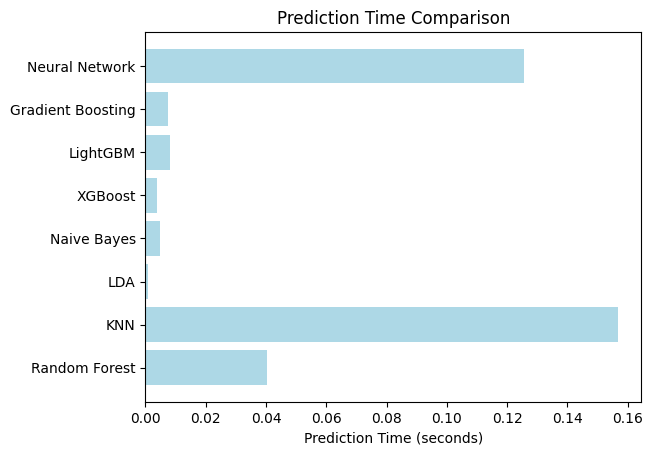

In [50]:
plt.barh(model_names, predict_times, color='lightblue')
plt.xlabel('Prediction Time (seconds)')
plt.title('Prediction Time Comparison')